      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64
             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  501.000000   
mean     3.6

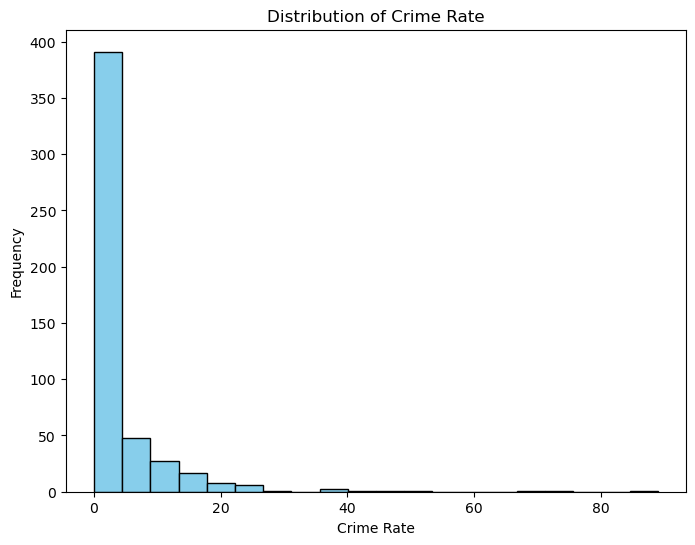

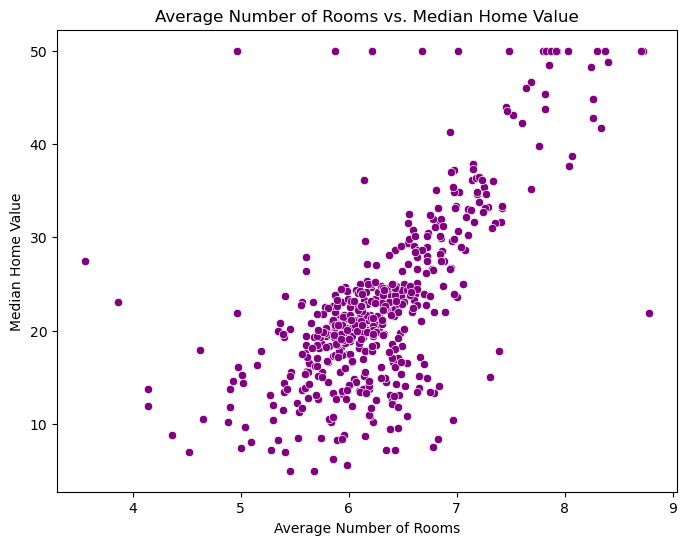

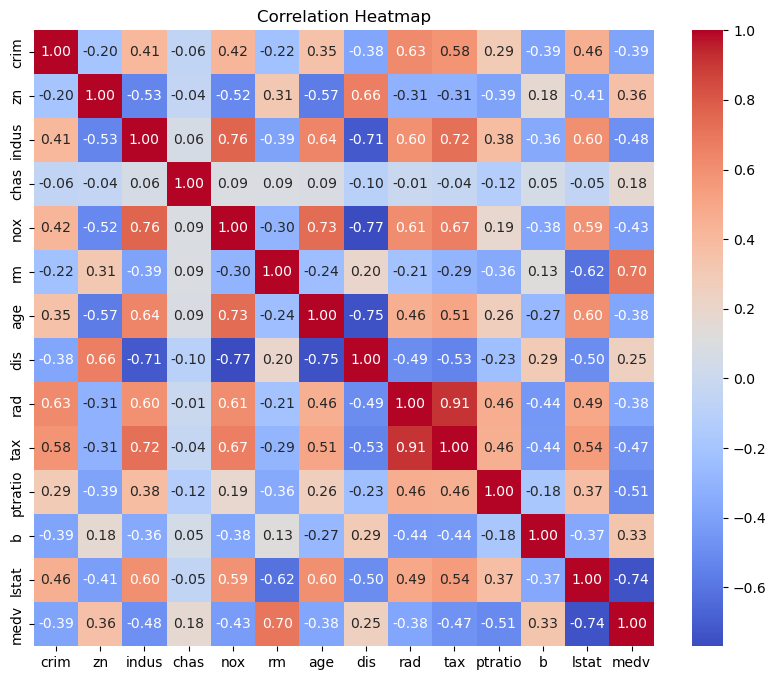

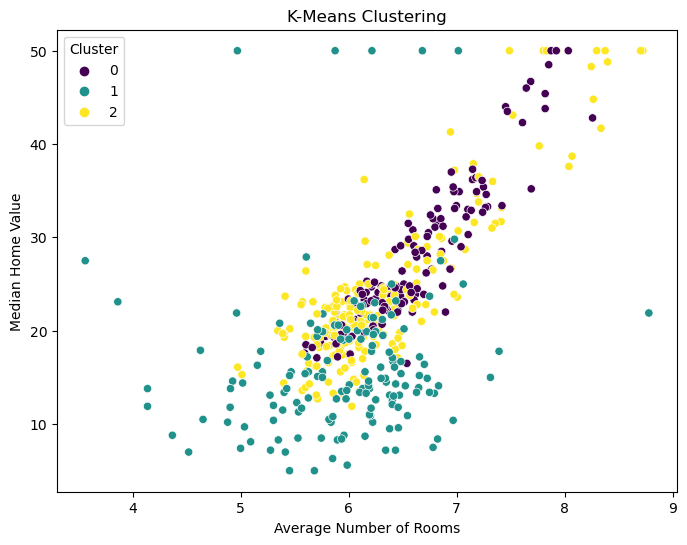

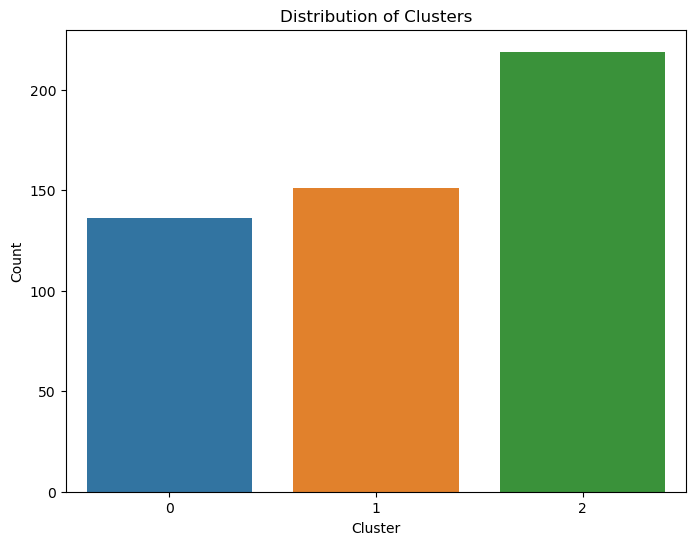

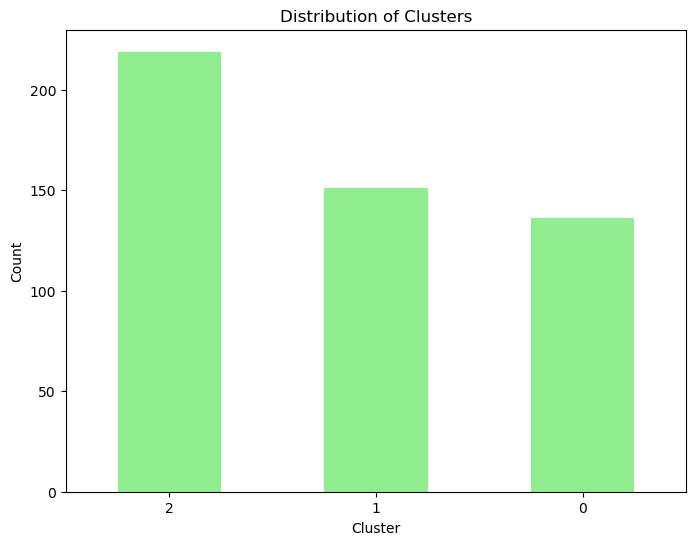

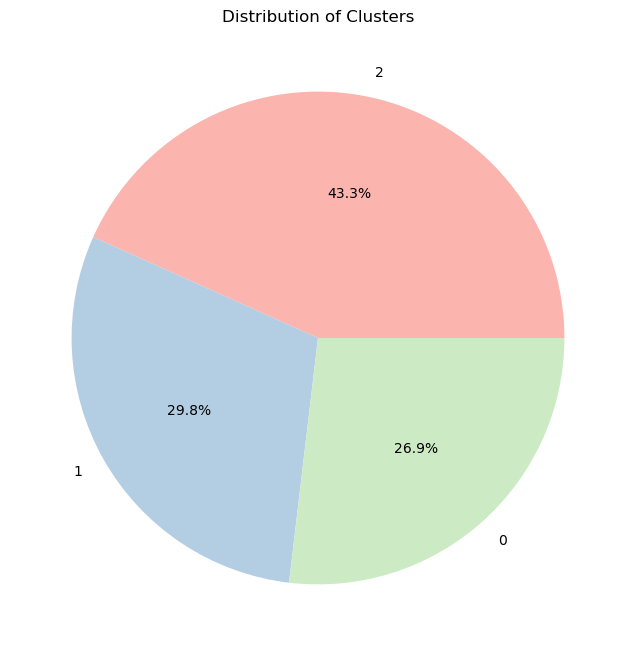

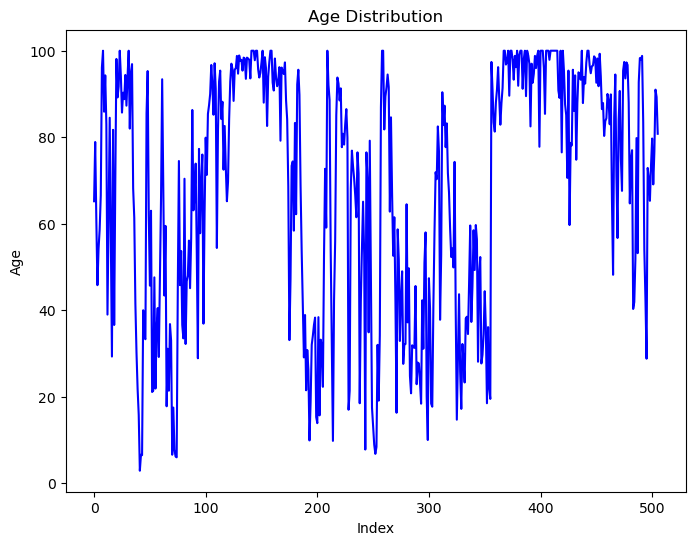

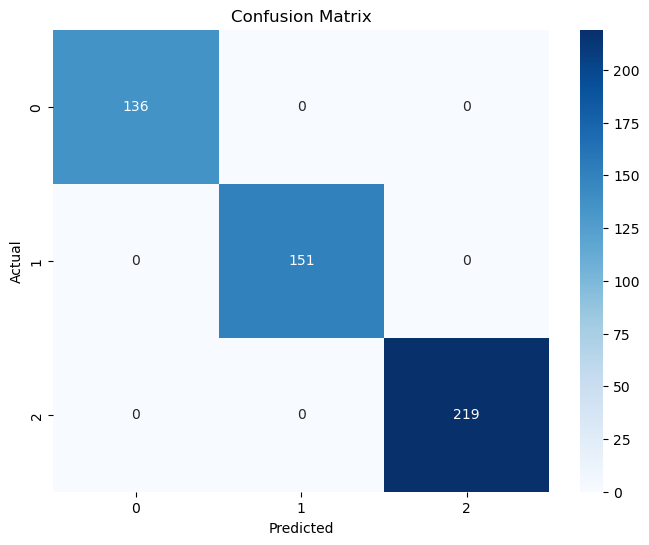

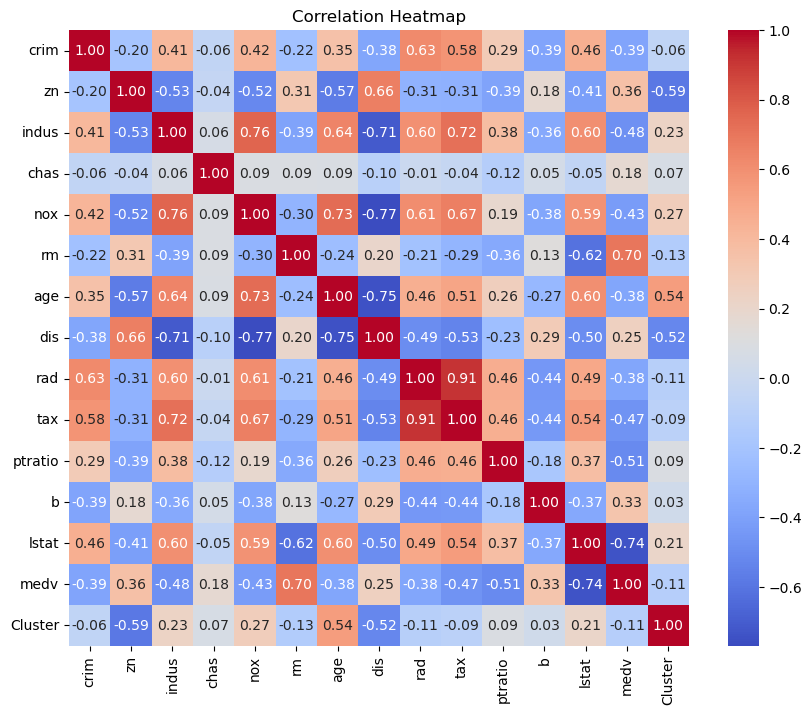

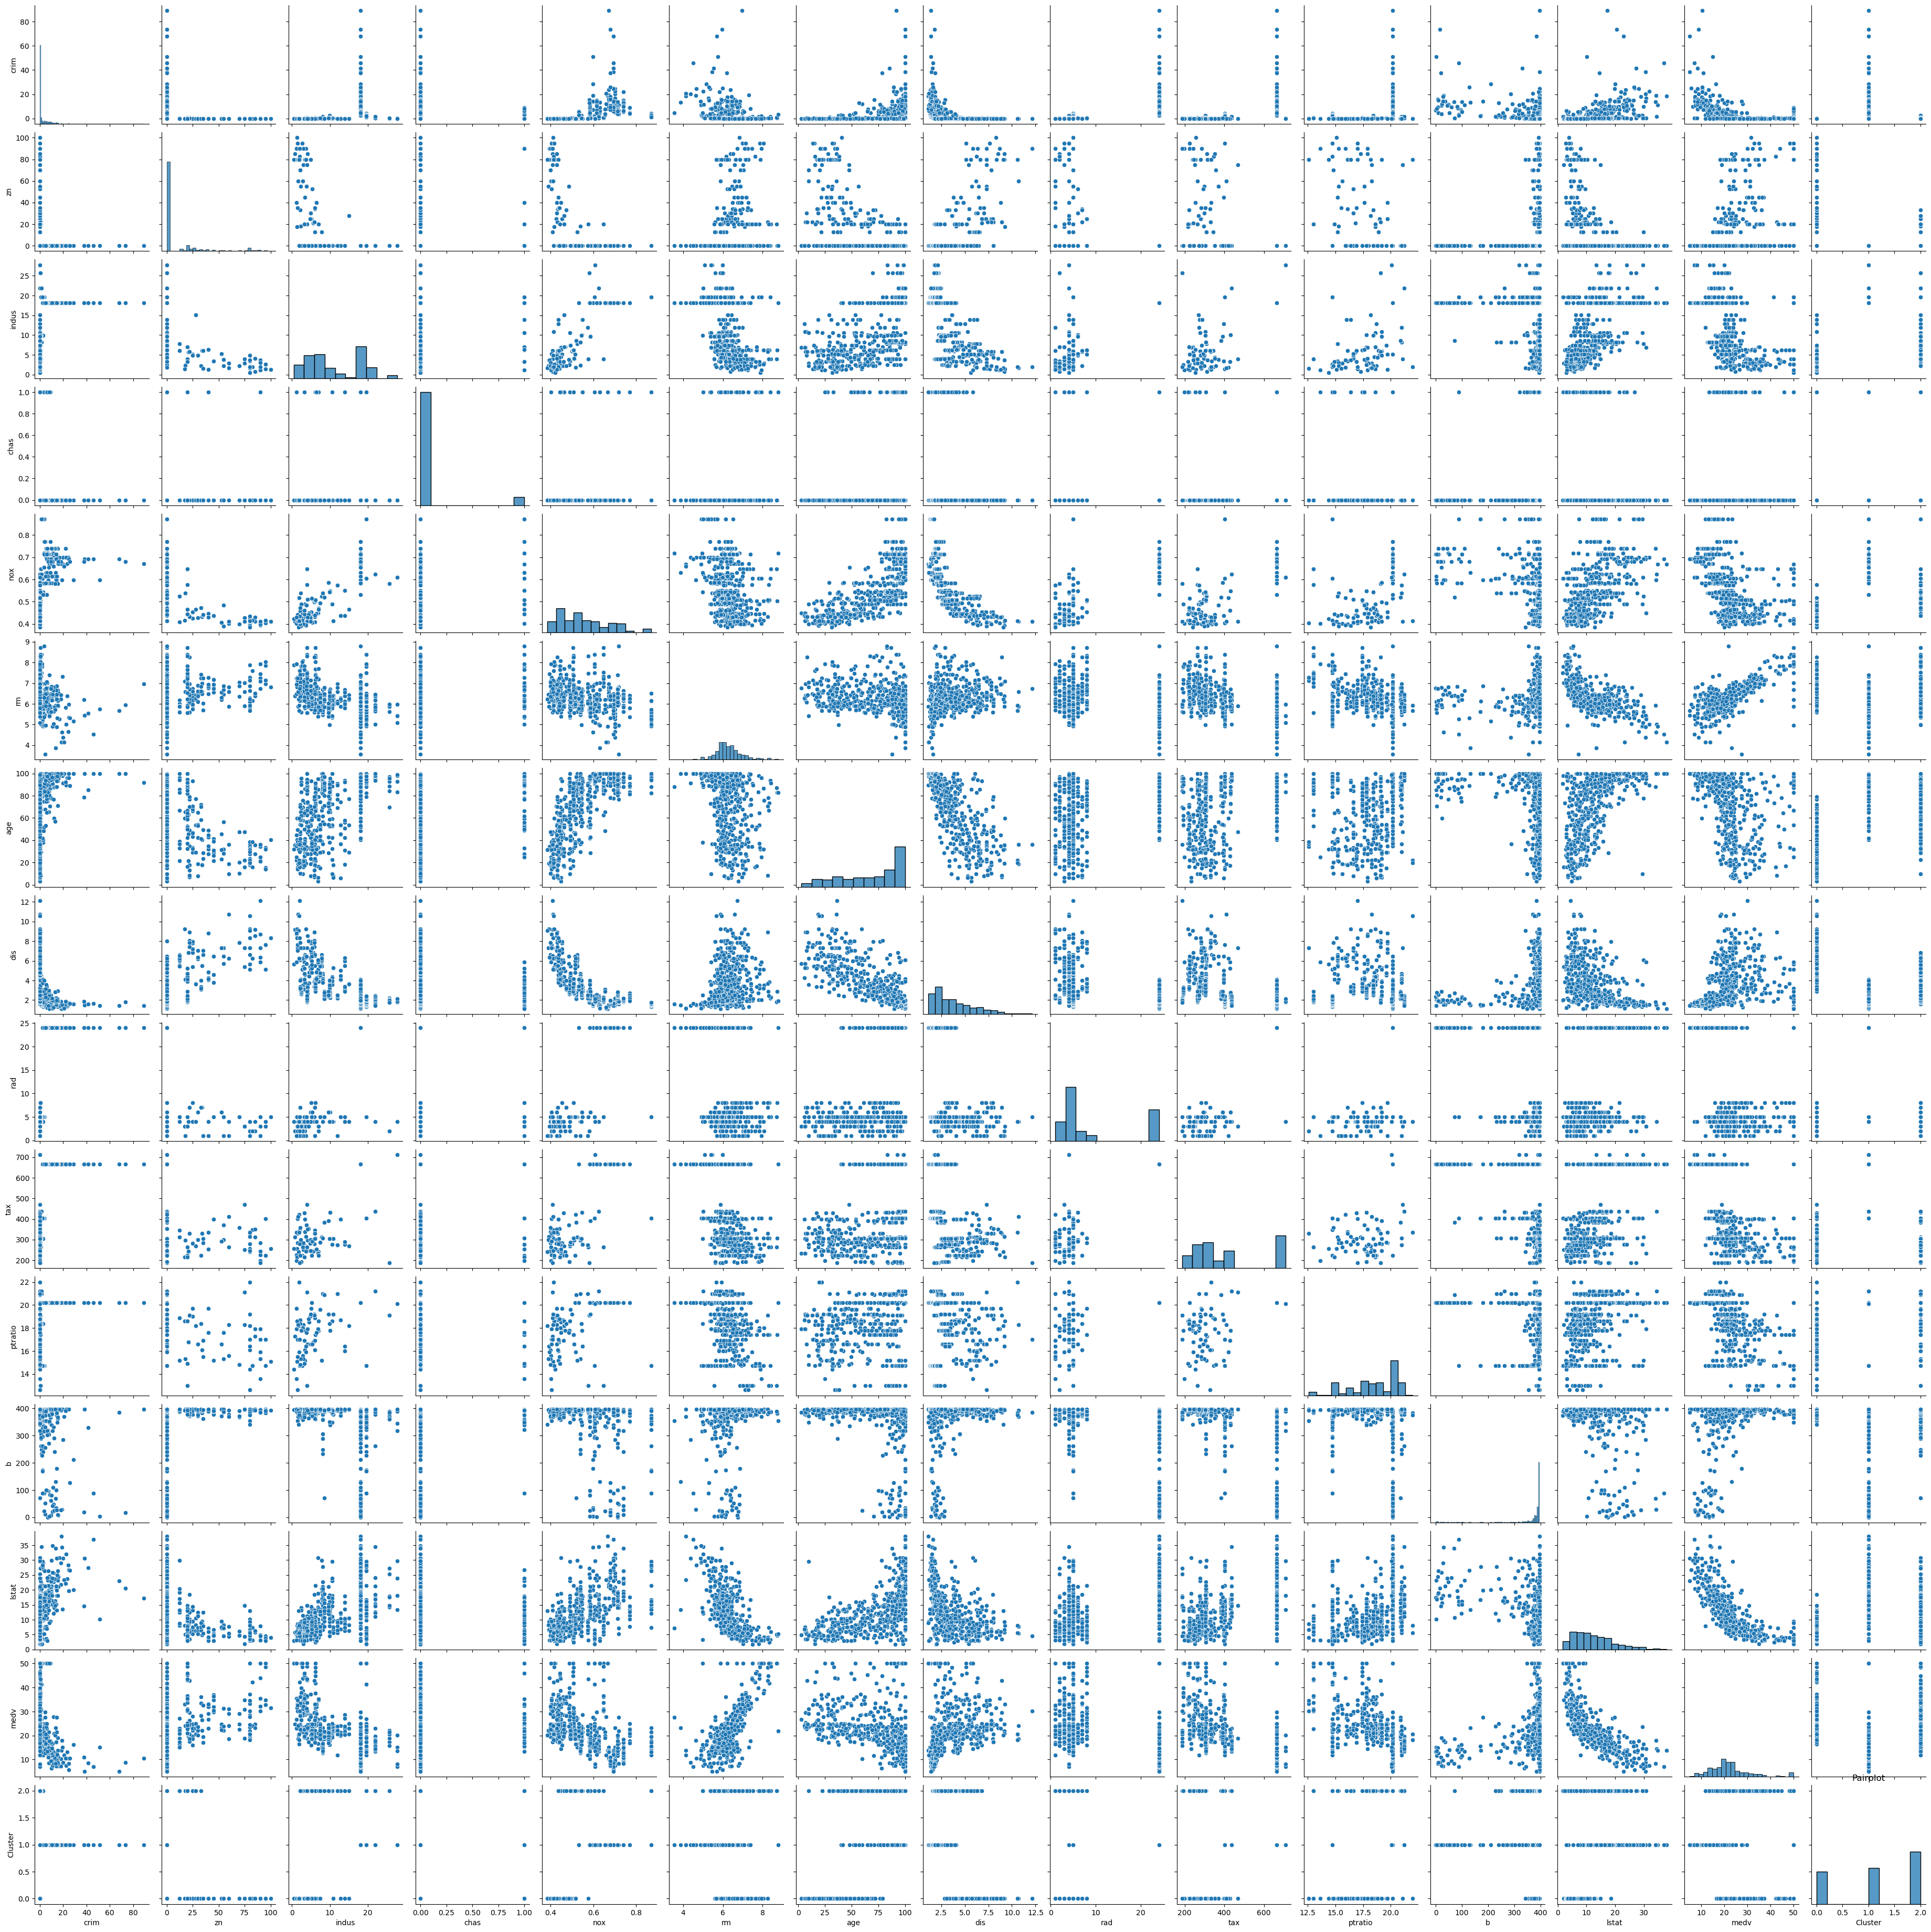

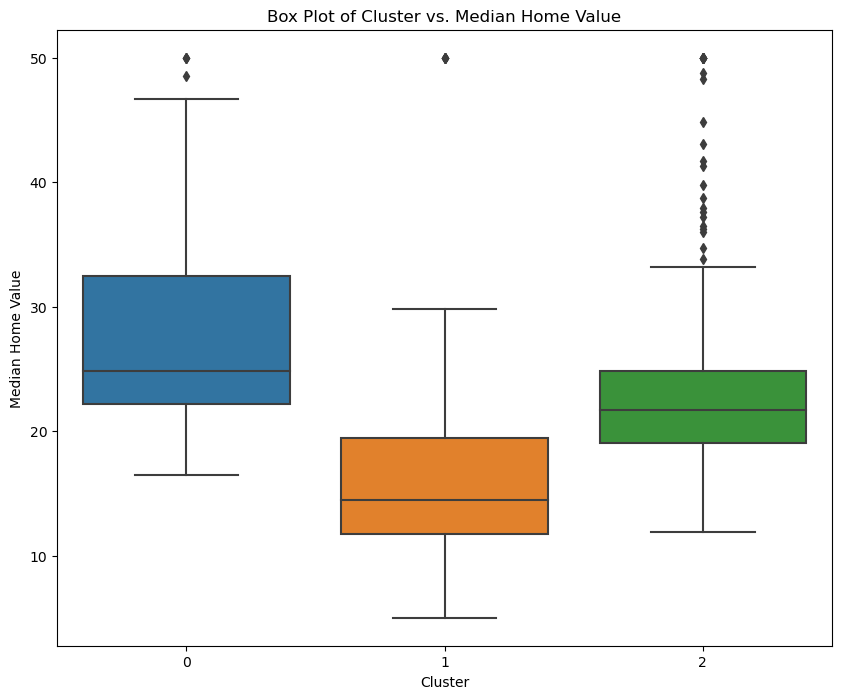

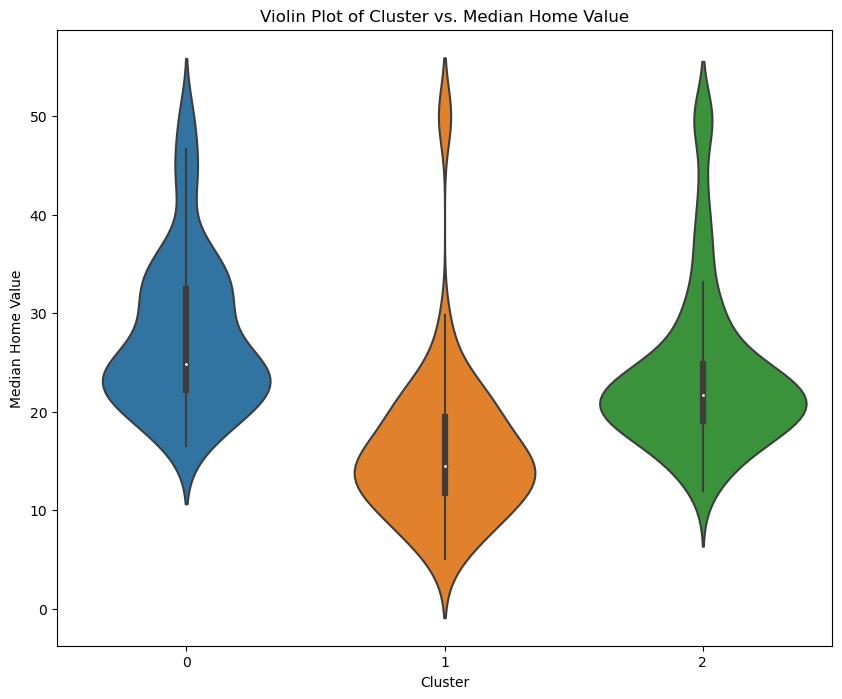

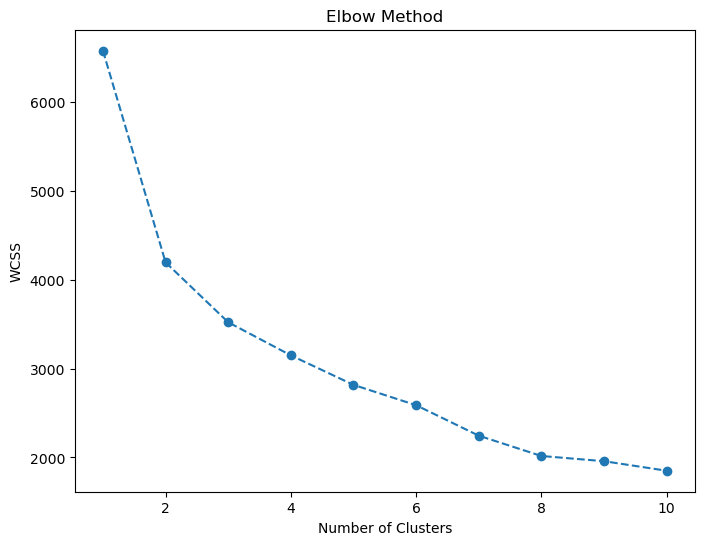

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings

# Ignore all warnings.
warnings.filterwarnings('ignore')

# Load the dataset
boston_data = pd.read_csv("BostonHousing.csv")

# Display the first few rows of the dataset
print(boston_data.head())

# Check for missing values
print(boston_data.isnull().sum())

# Summary statistics
print(boston_data.describe())

# Histogram of crime rate (crim)
plt.figure(figsize=(8, 6))
plt.hist(boston_data['crim'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Crime Rate')
plt.xlabel('Crime Rate')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of average number of rooms (rm) vs. median value of owner-occupied homes (medv)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='rm', y='medv', data=boston_data, color='purple')
plt.title('Average Number of Rooms vs. Median Home Value')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median Home Value')
plt.show()

# Create the heatmap for correlation
plt.figure(figsize=(10, 8))
sns.heatmap(boston_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()



# Handle missing values (NaNs) by imputing the missing values with the mean of each column
from sklearn.impute import SimpleImputer

# Imputer instance
imputer = SimpleImputer(strategy='mean')

# Impute missing values in the dataset
X_imputed = imputer.fit_transform(X)

# Data Preprocessing: Standardize features after imputation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Now continue with the rest of the code for clustering


# Determine the optimal number of clusters using elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Fit k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the dataset
boston_data['Cluster'] = kmeans.labels_

# Visualize clustering results (scatter plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='rm', y='medv', hue='Cluster', data=boston_data, palette='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median Home Value')
plt.show()
# Histogram of cluster distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster', data=boston_data)
plt.title('Distribution of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

# Bar chart of cluster distribution
plt.figure(figsize=(8, 6))
boston_data['Cluster'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Distribution of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Pie chart of cluster distribution
plt.figure(figsize=(8, 8))
boston_data['Cluster'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Pastel1'))
plt.title('Distribution of Clusters')
plt.ylabel('')
plt.show()

# Line graph
plt.figure(figsize=(8, 6))
plt.plot(boston_data['age'], color='blue')
plt.title('Age Distribution')
plt.xlabel('Index')
plt.ylabel('Age')
plt.show()

# Confusion Matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(boston_data['Cluster'], kmeans.labels_)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Heatmap (alternative way)
plt.figure(figsize=(10, 8))
sns.heatmap(boston_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Pairplot (Corner plot)
sns.pairplot(boston_data)
plt.title('Pairplot')
plt.show()

# Box plot
plt.figure(figsize=(10, 8))
sns.boxplot(x='Cluster', y='medv', data=boston_data)
plt.title('Box Plot of Cluster vs. Median Home Value')
plt.xlabel('Cluster')
plt.ylabel('Median Home Value')
plt.show()

# Violin plot
plt.figure(figsize=(10, 8))
sns.violinplot(x='Cluster', y='medv', data=boston_data)
plt.title('Violin Plot of Cluster vs. Median Home Value')
plt.xlabel('Cluster')
plt.ylabel('Median Home Value')
plt.show()


# Elbow plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Silhouette plot
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
